In [1]:
import csv
import sys
import numpy as np
import matplotlib.pyplot as plt
import math, copy

import the data from the data.csv file

In [2]:
file = open("data.csv", "r")
data = list(csv.reader(file, delimiter=","))
file.close()
del data[0]

converting the input from strings to 2 arrays of floats

In [3]:
x_tmp = []
y_tmp = []

for val in data:
    x_tmp.append(int(val[0]) / 1000)
    y_tmp.append(int(val[1]) / 1000)

x_train = np.array(x_tmp)
y_train = np.array(y_tmp)

plotting the data using matploth

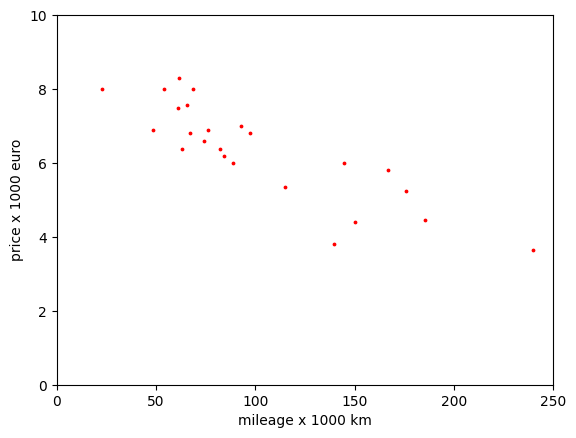

In [4]:
plt.scatter(x_train, y_train, s=3, c='red')
plt.ylabel('price x 1000 euro')
plt.xlabel('mileage x 1000 km')
plt.axis([0, 250, 0, 10])

plt.show()

a function to compute the cost function value

In [5]:
def compute_cost(x, y, w, b):
    
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        y_hat = w * x[i] + b
        cost = cost + (y_hat - y[i])**2
    
    total_cost = 1 / (2 * m) * cost
    
    return total_cost

Calculate the gradient

In [6]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        y_hat = w * x[i] + b
        dj_dw_i = (y_hat - y[i]) * x[i]
        dj_db_i = y_hat - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_db = dj_db / m
    dj_dw = dj_dw / m
    return dj_dw, dj_db

Gradient descent algorithm

In [19]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
    """
    J_history = []
    p_history = []
    
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_dw,dj_db = gradient_function(x, y, w, b)
        
        w_i = w - alpha * dj_dw
        b_i = b - alpha * dj_db
        
        ##automation of convergeance
        """
        if abs(w_i - w) < 0.00001 and abs(b_i - b) < 0.00001:
            print(f"number of iterations: {i}")
            J_history.append(cost_function(x, y, w_i, b_i))
            p_history.append([w_i,b_i])
            return w_i, b_i, J_history, p_history
        """
        
        w = w_i
        b = b_i
        
        if i < 1000000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w,b])
    
    return w, b, J_history, p_history
    

ploting the J_history in order to be able to choose alpha and the number of iteration, so we will have convergence of the cost function

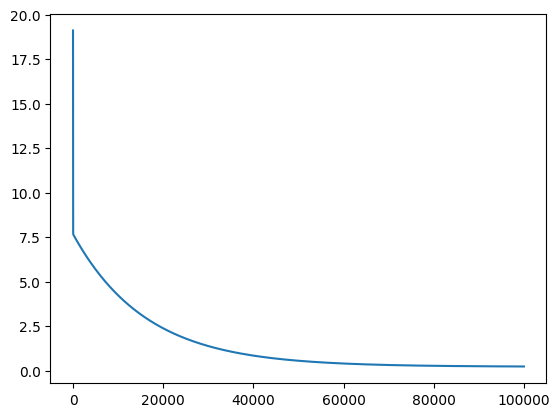

In [20]:
w,b, J_history, p_history = gradient_descent(x_train, y_train, 0, 0, 0.00015, 100000, compute_cost, compute_gradient)

plt.plot(J_history)
plt.show()



In [ ]:
ploting the evolution of [w,b] pair

[-0.01843718940018705, 8.115979812292878]


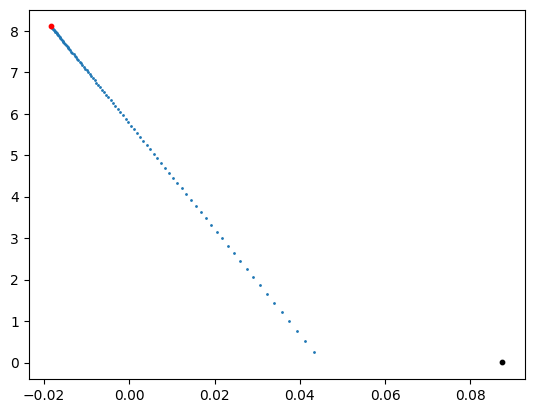

In [25]:
w_p = []
b_p = []

for i in range(len(p_history)):
    if i % 1000 == 0:
        w_p.append(p_history[i][0])
        b_p.append(p_history[i][1])
print(p_history[-1])
plt.scatter(w_p, b_p, s=1)
plt.scatter(w_p[0], b_p[0], s=10, c='black')
plt.scatter(w_p[-1], b_p[-1], s=10, c='red')
plt.show()

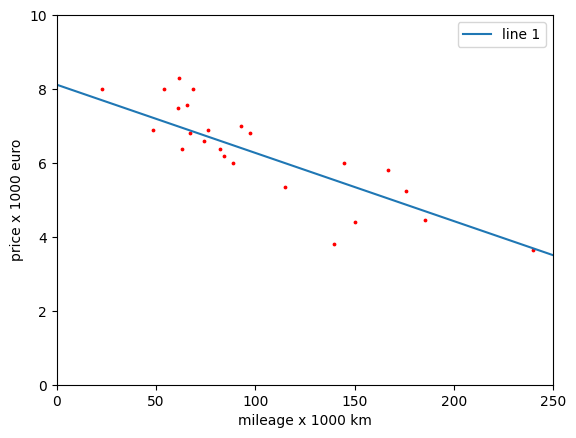

In [26]:
plt.scatter(x_train, y_train, s=3, c='red')
plt.ylabel('price x 1000 euro')
plt.xlabel('mileage x 1000 km')
plt.axis([0, 250, 0, 10])

x = []
y = []

x.append(0)
y.append(b)
x.append(400)
y.append(w * 400 + b)

plt.plot(x, y, label = "line 1")
plt.legend()

plt.show()

Please input the mileage of your car:
100000
A car with the mileage: 100000, can be sold based on our model with 6000


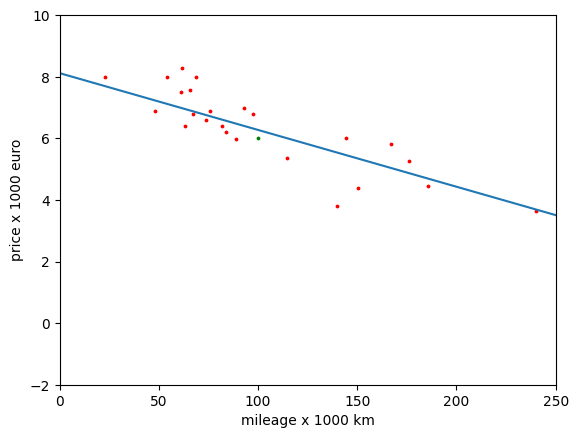

In [28]:
value = int(input("Please input the mileage of your car:\n"))
price = int(w * value/1000 + b)

if value > 400000:
    print("Can not compute a model for values larger than 400k")
else:
    print(f"A car with the mileage: {value}, can be sold based on our model with {price * 1000}")

    plt.scatter(x_train, y_train, s=3, c='red')
    plt.ylabel('price x 1000 euro')
    plt.xlabel('mileage x 1000 km')
    if value > 250 * 1000:
        plt.axis([0, value / 1000 + 100, -2, 10])
    else:
        plt.axis([0, 250, -2, 10])

    plt.plot(x, y)

    plt.scatter(value/1000, price, s=3, c='green')

    x = []
    y = []

    x.append(0)
    y.append(b)
    x.append(400)
    y.append(w * 400 + b)

    plt.show()